In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
source_order=['breastmnist', 'retinamnist', 'pneumoniamnist', 'dermamnist','bloodmnist','organcmnist','organsmnist','organamnist','chestmnist', 'pathmnist', 'octmnist','tissuemnist','medmnist','imagenet','radimagenet']

In [3]:
results = pd.DataFrame({'source': source_order})
for source in source_order[:-3]:
    target = source.removesuffix('mnist')
    df = pd.read_csv('fined_' + target + '.csv')
    print(len(df), df['test_auc'].isnull().any(axis=0))
    df = df[["source_flag","target_flag","batch_size","lr","momentum","wd","stopped_at","test_auc","val_loss"]]
    result = df.loc[df.groupby('source_flag')['val_loss'].idxmin()]
    result.loc[len(result)] = [source,0,0,0,0,0,0,0,0]

    result['total_count'] = df.groupby('source_flag')['source_flag'].transform('count').loc[result.index]
    result['source_flag'] = pd.Categorical(result['source_flag'], categories=source_order, ordered=True)
    result = result.sort_values('source_flag')
    #print(result.to_string(index=False))
    results[source] = result['test_auc'].to_numpy()
print(results.T.to_string(index=False))


1680 False
1680 False
1677 False
1680 False
1680 False
1680 False
1680 False
1680 False
1680 False
1680 False
1680 False
1680 False
         0           1              2          3          4           5           6           7          8         9         10          11        12        13          14
breastmnist retinamnist pneumoniamnist dermamnist bloodmnist organcmnist organsmnist organamnist chestmnist pathmnist  octmnist tissuemnist  medmnist  imagenet radimagenet
        0.0    0.805764       0.798037   0.855472   0.764202    0.845447     0.80472    0.798872   0.864871  0.866959   0.83208    0.834586  0.852757  0.885129    0.835004
   0.704433         0.0       0.692654   0.711163   0.691499    0.703535    0.714467    0.662051   0.786135   0.72851   0.69934    0.780503  0.800439  0.864082    0.783882
   0.932281    0.899047            0.0   0.854158   0.874753    0.884856    0.887256    0.932451   0.932457  0.930682  0.938944      0.9294  0.984528  0.983454    0.982407
   0.862

In [4]:
target = 'retina'
df = pd.read_csv('fined_' + target + '.csv')
empty_column = df['test_auc'].isnull().any(axis=0)
print(len(df), empty_column)

1680 False


In [5]:
df = df[["source_flag","target_flag","batch_size","lr","momentum","wd","stopped_at","test_auc","val_loss"]]
result = df.loc[df.groupby('source_flag')['val_loss'].idxmin()]

# Add a column for the count of rows in each group
result['total_count'] = df.groupby('source_flag')['source_flag'].transform('count').loc[result.index]

print(result.to_string(index=False))


   source_flag target_flag  batch_size   lr  momentum       wd  stopped_at  test_auc  val_loss  total_count
    bloodmnist retinamnist          64 0.10       0.0 0.000010         122  0.691499  1.094870          120
   breastmnist retinamnist          64 0.01       0.9 0.000100         111  0.704433  1.109215          120
    chestmnist retinamnist         128 1.00       0.0 0.001000         199  0.786135  0.978972          120
    dermamnist retinamnist          64 0.10       0.0 0.000000          85  0.711163  1.053760          120
      imagenet retinamnist         128 0.01       0.0 0.000001         149  0.864082  0.860726          120
      medmnist retinamnist         128 0.01       0.9 0.000001         102  0.800439  0.872037          120
      octmnist retinamnist          64 1.00       0.9 0.000010         199  0.699340  1.103379          120
   organamnist retinamnist          64 0.10       0.0 0.000000          74  0.662051  1.067039          120
   organcmnist retinamnist  

In [6]:
results = results.drop(['chestmnist'], axis=1)

In [7]:
results

,source,breastmnist,retinamnist,pneumoniamnist,dermamnist,bloodmnist,organcmnist,organsmnist,organamnist,pathmnist,octmnist,tissuemnist
0,breastmnist,0.000000,0.704433,0.932281,0.862468,0.992876,0.983451,0.954589,0.986210,0.964979,0.883849,0.800989
1,retinamnist,0.805764,0.000000,0.899047,0.860327,0.991855,0.980593,0.957112,0.985075,0.970616,0.876039,0.790242
2,pneumoniamnist,0.798037,0.692654,0.000000,0.852223,0.992301,0.978005,0.951181,0.982767,0.949770,0.894179,0.777617
3,dermamnist,0.855472,0.711163,0.854158,0.000000,0.991819,0.982010,0.952710,0.985772,0.976639,0.872540,0.809574
4,bloodmnist,0.764202,0.691499,0.874753,0.851415,0.000000,0.980627,0.950964,0.985944,0.966649,0.896279,0.795306
5,organcmnist,0.845447,0.703535,0.884856,0.849643,0.993744,0.000000,0.961756,0.981781,0.956416,0.932792,0.799910
6,organsmnist,0.804720,0.714467,0.887256,0.843979,0.989486,0.980927,0.000000,0.986676,0.943228,0.869131,0.765229
7,organamnist,0.798872,0.662051,0.932451,0.857133,0.994663,0.987562,0.957170,0.000000,0.974772,0.959053,0.805687
8,chestmnist,0.864871,0.786135,0.932457,0.875650,0.993760,0.982326,0.956492,0.983544,0.969795,0.942233,0.809253
9,pathmnist,0.866959,0.728510,0.930682,0.867850,0.995660,0.973196,0.951083,0.981065,0.000000,0.917923,0.799759


In [36]:
results[results['tissuemnist']>0.8448]

,source,breastmnist,retinamnist,pneumoniamnist,dermamnist,bloodmnist,organcmnist,organsmnist,organamnist,pathmnist,octmnist,tissuemnist
13,imagenet,0.885129,0.864082,0.983454,0.894645,0.998453,0.98088,0.955821,0.990409,0.989655,0.925839,0.844881


In [8]:
results.query('source=="medmnist" or source=="radimagenet" ')

,source,breastmnist,retinamnist,pneumoniamnist,dermamnist,bloodmnist,organcmnist,organsmnist,organamnist,pathmnist,octmnist,tissuemnist
12,medmnist,0.852757,0.800439,0.984528,0.883395,0.997205,0.983438,0.950510,0.984535,0.982768,0.951932,0.840627
14,radimagenet,0.835004,0.783882,0.982407,0.873521,0.995592,0.981231,0.953765,0.988400,0.985505,0.969283,0.829415


/tmp/ipykernel_3881041/827614571.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Breast', 'Retina', 'Pneumonia', 'Derma', 'Blood', 'OrganC', 'OrganS', 'OrganA', 'Chest', 'Path', 'OCT', 'Tissue', 'MedMNIST', 'ImageNet', 'RadImageNet'])


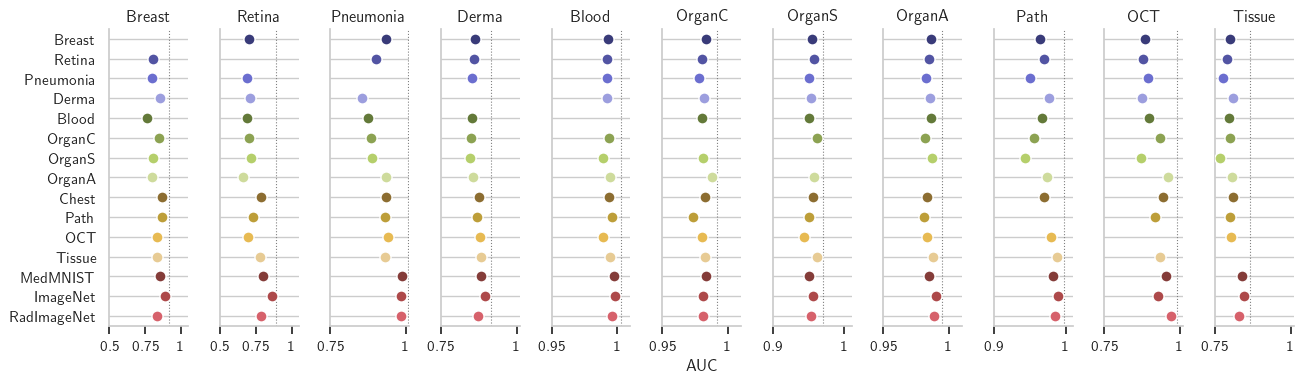

In [12]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
sns.set(font_scale=1.4)
custom_params = {'xtick.bottom': True}
sns.set_theme(style="whitegrid", rc=custom_params)
g = sns.PairGrid(results,
                 x_vars=results.columns[1:], y_vars=['source'], hue='source',palette="tab20b",
                 height=4, aspect=.3)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=8, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0.5, 1.05), xlabel="", ylabel="")

# Use semantically meaningful titles for the columns
MNISTtitles = ['breast', 'retina', 'pneumonia', 'derma','blood','organc','organs','organa', 'path', 'oct','tissue']
titles = ['Breast', 'Retina', 'Pneumonia', 'Derma','Blood','OrganC','OrganS','OrganA', 'Path', 'OCT','Tissue']

for i, (ax, title) in enumerate(zip(g.axes.flat, titles)):
    max = results[MNISTtitles[i]+'mnist'].max()
    # Set a different title for each axes
    ax.set(title=title)
    if title == 'OrganC':
        ax.set(xlabel='AUC')
    if title == 'Breast':
        ax.set_yticklabels(['Breast', 'Retina', 'Pneumonia', 'Derma', 'Blood', 'OrganC', 'OrganS', 'OrganA', 'Chest', 'Path', 'OCT', 'Tissue', 'MedMNIST', 'ImageNet', 'RadImageNet'])
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    if title in ['Blood', 'OrganC', 'OrganA']:
        ax.axvline(max+0.004, color='grey', ls=':', lw=0.8)
        ax.set_xlim([0.95, 1.01])
        xlabels = [0.95, 1]
        ax.set(xticks=[0.95, 1])
        ax.set_xticklabels(xlabels)
    elif title in ['OrganS','Path']:
        ax.axvline(max+0.008, color='grey', ls=':', lw=0.8)
        ax.set_xlim([0.9, 1.01])
        xlabels = [0.9, 1]
        ax.set(xticks=[0.9, 1])
        ax.set_xticklabels(xlabels)
    elif title in ['Derma', 'Pneumonia', 'OCT', 'Tissue']:
        ax.axvline(max+0.02, color='grey', ls=':', lw=0.8)
        ax.set_xlim([0.75, 1.01])
        xlabels = [0.75, 1]
        ax.set(xticks=[0.75, 1])
        ax.set_xticklabels(xlabels)
    else:
        ax.axvline(max+0.03, color='grey', ls=':', lw=0.8)
        xlabels = [0.5, 0.75, 1]
        ax.set(xticks=[0.5, 0.75, 1])
        ax.set_xticklabels(xlabels)
plt.tight_layout()
plt.savefig('fine_tune_AUC.pdf')
